In [1]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [2]:
import os
import numpy as np
import cv2
from tensorflow import keras
from tensorflow.keras import layers, models

# Define paths
dataset_path = r'C:\Users\gorij\face-recognition\recognition dataset'

# Prepare dataset
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        person_folder = os.path.join(folder, label)
        if os.path.isdir(person_folder):
            for filename in os.listdir(person_folder):
                img_path = os.path.join(person_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (100, 100))  # Resize images to uniform size
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load images
X, y = load_images_from_folder(dataset_path)
X = X.astype('float32') / 255.0  # Normalize pixel values
X = np.expand_dims(X, axis=-1)  # Add channel dimension

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(np.unique(y_encoded)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save(r'C:\Users\gorij\face-recognition\face_recognition_model.h5')


Epoch 1/10
85/85 [==============================] - 24s 269ms/step - loss: 0.8298 - accuracy: 0.7371 - val_loss: 0.1401 - val_accuracy: 0.9660
Epoch 2/10
85/85 [==============================] - 21s 242ms/step - loss: 0.0589 - accuracy: 0.9848 - val_loss: 0.0681 - val_accuracy: 0.9822
Epoch 3/10
85/85 [==============================] - 20s 236ms/step - loss: 0.0254 - accuracy: 0.9933 - val_loss: 0.0469 - val_accuracy: 0.9808
Epoch 4/10
85/85 [==============================] - 21s 252ms/step - loss: 0.0121 - accuracy: 0.9970 - val_loss: 0.0432 - val_accuracy: 0.9867
Epoch 5/10
85/85 [==============================] - 20s 236ms/step - loss: 0.0216 - accuracy: 0.9937 - val_loss: 0.0342 - val_accuracy: 0.9956
Epoch 6/10
85/85 [==============================] - 21s 247ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0312 - val_accuracy: 0.9956
Epoch 7/10
85/85 [==============================] - 21s 252ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0311 - val_accuracy: 0.9926

C:\Users\gorij\anaconda3\envs\tensor\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test Accuracy: 13.67%
Test Loss: 0.0652


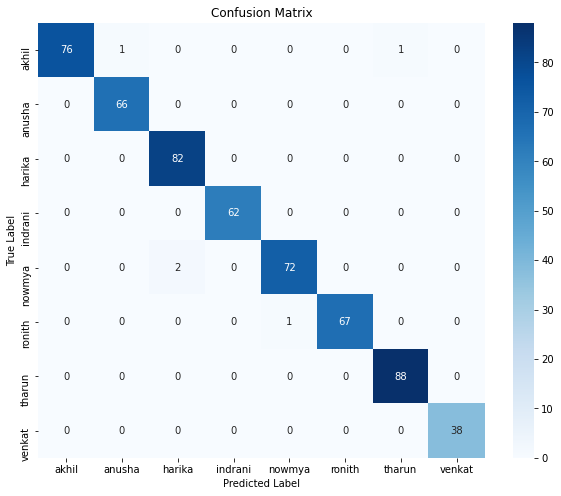

Classification Report:

              precision    recall  f1-score   support

       akhil       1.00      0.97      0.99        78
      anusha       0.99      1.00      0.99        66
      harika       0.98      1.00      0.99        82
     indrani       1.00      1.00      1.00        62
      nowmya       0.99      0.97      0.98        74
      ronith       1.00      0.99      0.99        68
      tharun       0.99      1.00      0.99        88
      venkat       1.00      1.00      1.00        38

    accuracy                           0.99       556
   macro avg       0.99      0.99      0.99       556
weighted avg       0.99      0.99      0.99       556



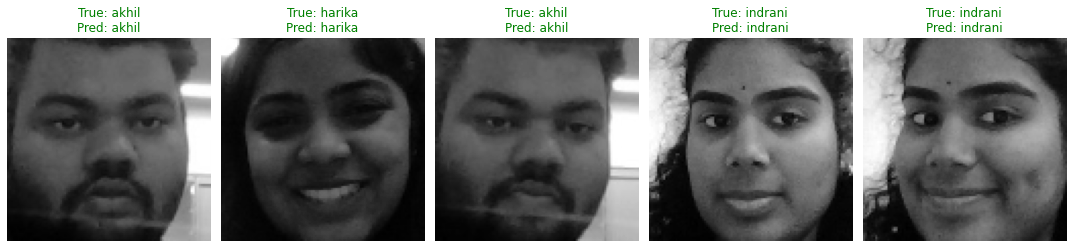

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model_path = r'C:\Users\gorij\face-recognition\face_recognition_model.h5'
model = load_model(model_path)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_classes, label_encoder.classes_)

# Classification Report
def print_classification_report(y_true, y_pred, labels):
    report = classification_report(y_true, y_pred, target_names=labels)
    print("Classification Report:\n")
    print(report)

# Print classification report
print_classification_report(y_test, y_pred_classes, label_encoder.classes_)

# Additional Visualization: Test Set Samples with Predictions
def visualize_test_samples(X_test, y_true, y_pred_classes, labels, num_samples=5):
    plt.figure(figsize=(15, 10))
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    for i, idx in enumerate(indices):
        img = X_test[idx].squeeze()  # Remove channel dimension
        true_label = labels[y_true[idx]]
        pred_label = labels[y_pred_classes[idx]]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label}\nPred: {pred_label}", color='green' if true_label == pred_label else 'red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize a few test samples with predictions
visualize_test_samples(X_test, y_test, y_pred_classes, label_encoder.classes_)
